# Ch6. 特征转换：数学显神通 

到目前为止，我们似乎已经从数据的所有角度应用了特征工程工具。从通过分析表格数据以确定数据的等级，到通过统计方法构建并选择列以优化机器学习流水线，我们为处理数据中的特征做了很多了不起的事。


再次提醒：有很多方法可以增强机器学习的效果。我们通常认为，主要的两个特征是准确率和预测/拟合时间。这意味着，如果利用特征工程工具后，机器学习流水线的准确率在交叉验证中有所提高，或者拟合/预测的速度加快，那就代表特征工程成功了。当然，我们的终极目标是既优化准确率又优化时间，构建出更好的流水线。

在前面的5章中，我们了解了所谓的经典特征工程。目前，我们已经讨论了特征工程的5个主要类别/步骤。

- **探索性数据分析**：在应用机器学习流水线，甚至在使用机器学习算法或特征工程工具之前，我们理应对数据集进行一些基本的描述性统计，并进行可视化操作，以便更好地理解数据的性质。
- **特征理解**：在了解了数据的大小和形状后，应该进一步仔细观察数据集的每一列（如果有可能的话）和大致特点，包括数据的等级，因为这会决定如何清洗数据。
- **特征增强**：这个阶段是关于改变数据值和列的，我们根据数据的等级填充缺失值，并按需执行虚拟变量转换和缩放操作。
- **特征构建**：在拥有可以得到的好数据集之后，可以考虑构建新的列，以便理解特征交互情况。
- **特征选择**：在选择阶段，用所有原始和新构建的列进行（通常是单变量）统计测试，选取性能佳的特征，以消除噪声影响、加速计算。

## 6.1 维度缩减：特征转换、特征选择与特征构建 

刚才，我们提到了如何压缩数据集，用全新的方法以更少的列描述数据。听起来和特征选择的概念很类似：从原始数据集中删除列，通过消除噪声和增强信号列来创建一个不同而且更好的数据集。虽然特征选择和特征转换都是降维的好办法，但是它们的方法迥然不同。


特征选择仅限于从原始列中选择特征；特征转换算法则将原始列组合起来，从而创建可以更好地描述数据的特征。因此，特征选择的降维原理是隔离信号列和忽略噪声列。


特征转换方法使用原始数据集的隐藏结构创建新的列，生成一个全新的数据集，结构与之前不同。这些算法创建的新特征非常强大，只需要几个就可以准确地解释整个数据集。


特征转换的原理是生成可以捕获数据本质的新特征，这一点和特征构造的本质类似：都是创建新特征，捕捉数据的潜在结构。需要注意，这两个不同的过程方法截然不同，但是结果类似。

特征构造用几个列之间的简单操作（加法和乘法等）构造新的列。意思是，经典特征构造过程构造出的任何特征都只能用原始数据集中的几个列生成。如果我们的目标是创造足够多的特征，捕获所有可能的特征交互，那么也许会生成大量额外的列。例如，如果数据集有1000个甚至更多特征，我们要捕获所有特征交互的
一个子集，就需要几万个列来构建足够多的特征。


特征转换方法可以用每个列中的一点点特征创建超级列，所以不需要创建很多新特征就可以捕获所有潜在的特征交互。因为特征转换算法涉及矩阵和线性代数，所以不会创造出比原有列更多的列，而且仍能提取出原始列中的结构。


特征转换算法可以选择佳的列，将其与几个全新的列进行组合，从而构建新的特征。我们可以认为，特征转换在本书中强大的算法之列。下面介绍首先要用到的算法和数据集：主成分分析和鸢尾花数据集。

## 6.2 主成分分析 

### 6.2.1 PCA的工作原理

主成分分析比较简单，不在这里赘述了。

### 6.2.2 手动计算PCA

In [1]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

In [2]:
# 创建 X 和 y 变量，存储特征和响应列 
iris_X, iris_y = iris.data, iris.target

In [3]:
# 要预测的花的名称 
iris.target_names 

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# 特征名称 
iris.feature_names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
label_dict = {i: k for i, k in enumerate(iris.target_names)}
label_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

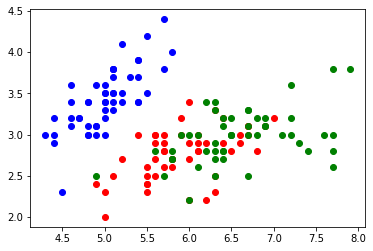

In [6]:
# scatter基本用法
plt.scatter(iris_X[:,0].real[iris_y==0], iris_X[:,1].real[iris_y==0], color='blue')
plt.scatter(iris_X[:,0].real[iris_y==1], iris_X[:,1].real[iris_y==1], color='red')
plt.scatter(iris_X[:,0].real[iris_y==2], iris_X[:,1].real[iris_y==2], color='green')

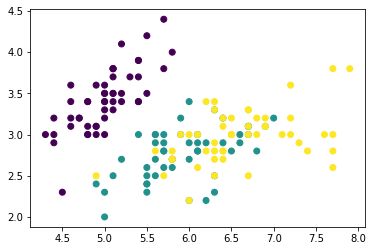

In [7]:
# 方法二：
plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y)

In [8]:
# 自定义散点图
def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label, marker, color in zip(
    range(3), ('^', 's', 'o'), ('blue', 'red', 'green')):
        plt.scatter(x=X[:,0].real[y == label],
                   y=X[:,1].real[y == label],
                   color=color, alpha=.5, label=label_dict[label])
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

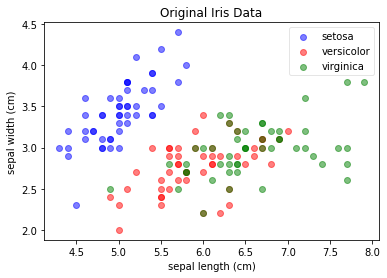

In [9]:
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

In [10]:
# 手动计算 PCA 
import numpy as np

print(f"shape: {iris_X.shape}")
# 计算均值向量 
mean_vector = iris_X.mean(axis=0)
print(mean_vector)

shape: (150, 4)
[5.84333333 3.05733333 3.758      1.19933333]


In [11]:
# 计算协方差矩阵 
cov_mat = np.cov((iris_X).T)
print(cov_mat)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


In [12]:
# 计算鸢尾花数据集的特征向量和特征值 
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

In [13]:
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i]
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(30 * '-') 

Eigenvector 1: 
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Eigenvalue 1 from covariance matrix: 4.228241706034863
------------------------------
Eigenvector 2: 
[-0.65658877 -0.73016143  0.17337266  0.07548102]
Eigenvalue 2 from covariance matrix: 0.24267074792863397
------------------------------
Eigenvector 3: 
[-0.58202985  0.59791083  0.07623608  0.54583143]
Eigenvalue 3 from covariance matrix: 0.07820950004291884
------------------------------
Eigenvector 4: 
[ 0.31548719 -0.3197231  -0.47983899  0.75365743]
Eigenvalue 4 from covariance matrix: 0.023835092973450264
------------------------------


In [14]:
explained_variance_ratio = eig_val_cov / eig_val_cov.sum()
explained_variance_ratio
# 解释总方差

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0, 0.5, '% of Variance Explained <= k')

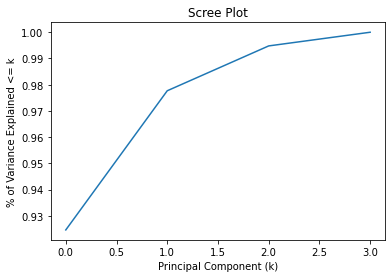

In [15]:
plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance Explained <= k')

In [16]:
# 保存两个特征向量 
top_2_eigenvectors = eig_vec_cov[:,:2].T

# 转置，每行是一个主成分，两行代表两个主成分 
top_2_eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

In [17]:
iris_X_PCA = np.dot(iris_X, top_2_eigenvectors.T)
print(iris_X_PCA[:5,])
print('-------')
print(f"shape: {iris_X_PCA.shape}")

[[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]]
-------
shape: (150, 2)


### 6.2.3 scikit-learn的 PCA 

In [18]:
from sklearn.decomposition import PCA

# 和其他 scikit 模块一样，先实例化
pca = PCA(n_components=2)
# 在数据上使用 PCA 
pca.fit(iris_X) 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [19]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [20]:
pca.transform(iris_X)[:5,]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [21]:
# 解决中文乱码问题
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

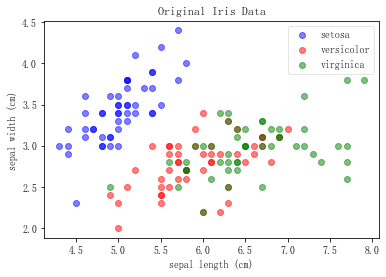

In [22]:
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

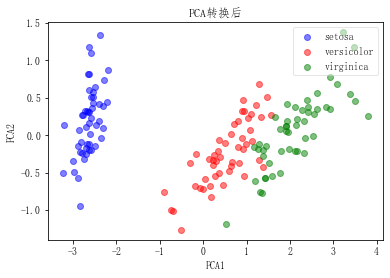

In [23]:
plot(pca.transform(iris_X), iris_y, "PCA转换后", "PCA1", "PCA2")

In [24]:
# 每个主成分解释的方差量 
# 和之前的一样 
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [25]:
# PCA 可以消除相关性 

# 原始数据集的相关矩阵 
np.corrcoef(iris_X.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [26]:
# 对角线上的相关系数
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]]

array([-0.11756978,  0.87175378,  0.81794113, -0.4284401 , -0.36612593])

In [27]:
# 原始数据集的平均相关性 
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()

0.1555118162316355

In [28]:
#取所有主成分 
full_pca = PCA(n_components=4)

# PCA 拟合数据集 
full_pca.fit(iris_X) 
pca_iris = full_pca.transform(iris_X)
    
np.corrcoef(pca_iris.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()
# 非常接近 0

-5.262961165504107e-16

### 6.2.4 中心化和缩放对 PCA的影响 

和前面用过的很多转换方法一样，特征的缩放对于转换往往极其重要。PCA也不例外。上面说到，scikit-learn的PCA在预测阶段会将数据进行中心化（centering），但为什么不是在拟合时进行？如果scikit-learn的PCA要在预测时添加一步数据中心化的操作，那为什么不在计算特征向量时就完成？我们的假设是：将数据中心化不会影响主成分。下面进行验证。

In [29]:
from sklearn.preprocessing import StandardScaler

X_centered = StandardScaler(with_std=False).fit_transform(iris_X)
X_centered[:5,]

array([[-0.74333333,  0.44266667, -2.358     , -0.99933333],
       [-0.94333333, -0.05733333, -2.358     , -0.99933333],
       [-1.14333333,  0.14266667, -2.458     , -0.99933333],
       [-1.24333333,  0.04266667, -2.258     , -0.99933333],
       [-0.84333333,  0.54266667, -2.358     , -0.99933333]])

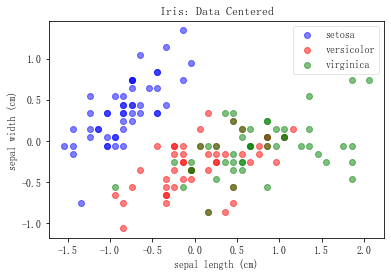

In [30]:
plot(X_centered, iris_y, "Iris: Data Centered", "sepal length (cm)", "sepal width (cm)")

In [31]:
# 用之前实例化的 PCA类（n_components 设为 2）拟合中心化后的数据集： 
# 拟合数据集 
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
# 主成分一样 
pca.components_ 

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [33]:
# PCA 自动进行中心化，投影一样 
pca.transform(X_centered)[:5,] 

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

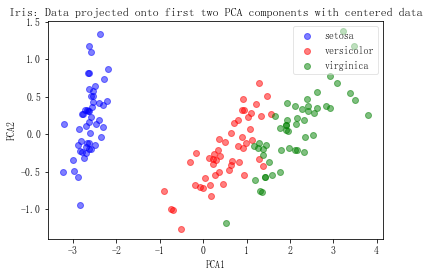

In [34]:
# PCA 中心化后的数据图，和之前的一样 
plot(pca.transform(X_centered), iris_y, "Iris: Data projected onto first two PCA components with centered data", "PCA1", "PCA2")

In [35]:
# 每个主成分解释方差的百分比 
pca.explained_variance_ratio_ 

array([0.92461872, 0.05306648])

这是因为，原始矩阵和中心化后矩阵的协方差矩阵相同。如果两个矩阵的协方差矩阵相同，那么它们的特征值分解也相同。因此，scikit-learn的PCA不会对数据进行中心化，因为无论是否进行中心化操作，结果都一样。那么为什么要加上这个步骤呢？

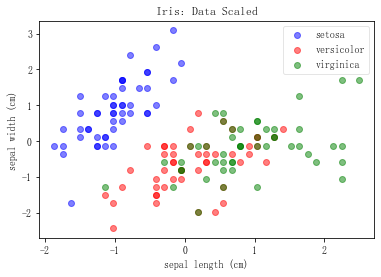

In [36]:
# z 分数缩放 
X_scaled = StandardScaler().fit_transform(iris_X)

plot(X_scaled, iris_y, "Iris: Data Scaled", "sepal length (cm)", "sepal width (cm)")

需要注意，到这里，我们已经以不同的形式绘制了鸢尾花数据集：原始格式，中心化，以及完全缩放。在每幅图中，数据点完全相同，但是轴不一样。这是预料之中的：中心化和缩放不会改变数据的形状，但是会影响特征工程和机器学习流水线的特征交互。

In [37]:
# 二维 PCA 拟合 
pca.fit(X_scaled)

# 与中心化后的主成分不同 
pca.components_  

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [38]:
# 缩放不同，投影不同 
pca.transform(X_scaled)[:5,] 

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [39]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

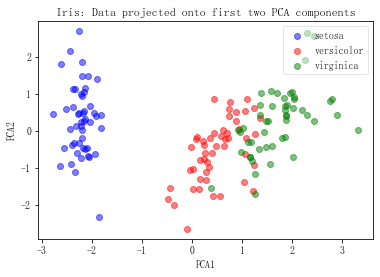

In [40]:
# 绘制缩放后数据的 PCA 
plot(pca.transform(X_scaled), iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2") 

区别不明显，但是如果你仔细观察并与之前投影后的原始和中心化数据进行比较，可以看见 一点微妙的差异。 

### 6.2.5 深入解释主成分 

In [41]:
# how to interpret and use components
pca.components_  # a 2 x 4 matrix

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [42]:
# Multiply original matrix (150 x 4) by components transposed (4 x 2) to get new columns (150 x 2)
np.dot(X_scaled, pca.components_.T)[:5,]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [43]:
# extract the first row of our scaled data
first_scaled_flower = X_scaled[0]
# extract the two PC's
first_Pc = pca.components_[0]
second_Pc = pca.components_[1]

first_scaled_flower.shape  # (4,)

# same result as the first row of our matrix multiplication
np.dot(first_scaled_flower, first_Pc), np.dot(first_scaled_flower, second_Pc)

(-2.2647028088075905, 0.4800265965209866)

In [44]:
# cut out last two columns of the original iris dataset
iris_2_dim = iris_X[:,2:4]

# center the data
iris_2_dim = iris_2_dim - iris_2_dim.mean(axis=0)

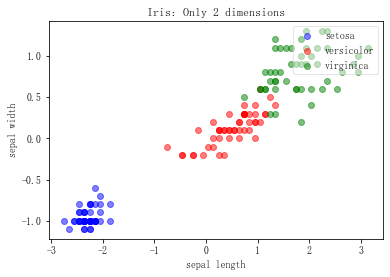

In [45]:
plot(iris_2_dim, iris_y, "Iris: Only 2 dimensions", "sepal length", "sepal width")

In [46]:
# instantiate a PCA of 2 components
twodim_pca = PCA(n_components=2)

# fit and transform our truncated iris data
iris_2_dim_transformed = twodim_pca.fit_transform(iris_2_dim)

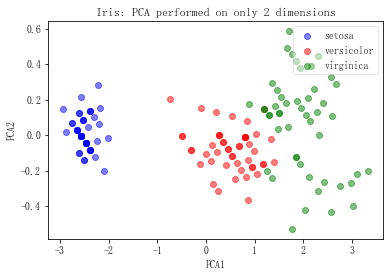

In [47]:
plot(iris_2_dim_transformed, iris_y, "Iris: PCA performed on only 2 dimensions", "PCA1", "PCA2")

[(-1.0, 1.0),
 Text(0, 0.5, 'component 2'),
 (-3.0, 3.0),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'Projected Data')]

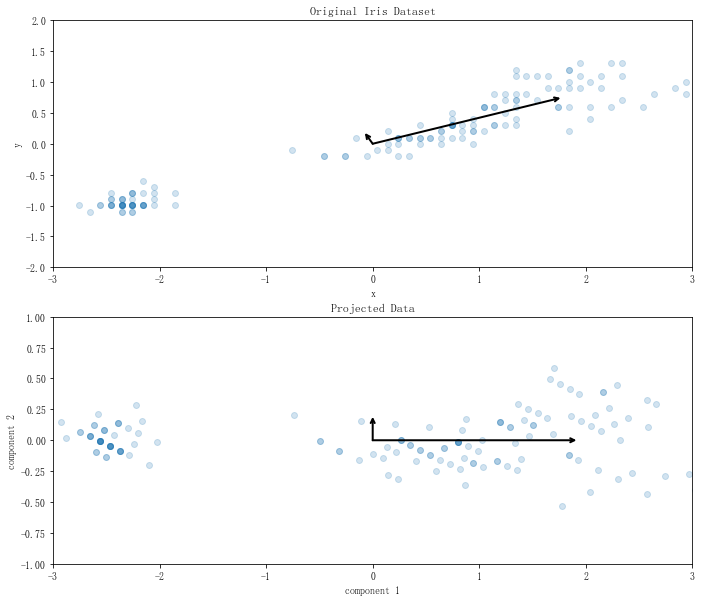

In [48]:
# This code is graphing both the original iris data and the projected version of it using PCA.
# Moreover, on each graph, the principal components are graphed as vectors on the data themselves
# The longer of the arrows is meant to describe the first principal component and
# the shorter of the arrows describes the second principal component
def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->',linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)
for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
    v = vector * np.sqrt(length)  # elongdate vector to match up to explained_variance
    draw_vector(twodim_pca.mean_, 
                twodim_pca.mean_ + v, ax=ax[0])
ax[0].set(xlabel='x', ylabel='y', title='Original Iris Dataset',
         xlim=(-3, 3), ylim=(-2, 2))


ax[1].scatter(iris_2_dim_transformed[:, 0], iris_2_dim_transformed[:, 1], alpha=0.2)
for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
    transformed_component = twodim_pca.transform([vector])[0]  # transform components to new coordinate system
    v = transformed_component * np.sqrt(length)  # elongdate vector to match up to explained_variance
    draw_vector(iris_2_dim_transformed.mean(axis=0),
                iris_2_dim_transformed.mean(axis=0) + v, ax=ax[1])
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='Projected Data',
          xlim=(-3, 3), ylim=(-1, 1))

## 6.3 线性判别分析 

**线性判别分析**（LDA，lineardiscriminantanalysis）是特征变换算法，也是有监督分类器。LDA一般用作分类流水线的预处理步骤。和PCA一样，LDA的目标是提取一个新的坐标系，将原始数据集投影到一个低维空间中。和PCA的主要区别在于，LDA不会专注于数据的方差，而是优化低维空间，以获得佳的类别可分性。意思是，新的坐标系在为分类模型查找决策边界时更有用，非常适合用于构建分类流水线。

---

注释：LDA 极为有用的原因在于，基于类别可分性的分类有助于避免机器学习流水线 的过拟合，也叫**防止维度诅咒**。LDA也会降低计算成本。

---

### 6.3.1 LDA的工作原理 

LDA和PCA一样可以作为降维工具使用，但并不会计算整体数据的协方差矩阵的特征值，而是计算类内（within-class）和类间（between-class）散布矩阵的特征值和特征向量。LDA分为5个步骤：

(1)计算每个类别的均值向量；

(2)计算类内和类间的散布矩阵；

(3)计算$S_{W}^{-1}S_B$的特征值和特征向量；

(4)降序排列特征值，保留前k个特征向量；

(5)使用前几个特征向量将数据投影到新空间。

#### 1. 计算每个类别的均值向量 

首先计算每个类别中每列的均值向量，分别是 setosa、versicolor 和 virginica： 

In [49]:
# 每个类别的均值向量 
# 将鸢尾花数据集分成 3 块 
# 每块代表一种鸢尾花，计算均值
mean_vectors = []
for cl in [0, 1, 2]:
    class_mean_vector = np.mean(iris_X[iris_y==cl], axis=0) #列的平均值
    mean_vectors.append(class_mean_vector)
    print(label_dict[cl], class_mean_vector)

setosa [5.006 3.428 1.462 0.246]
versicolor [5.936 2.77  4.26  1.326]
virginica [6.588 2.974 5.552 2.026]


#### 2. 计算类内和类间的散布矩阵 

我们先计算**类内的散布矩阵**，定义如下：

$$
S_W=\sum_{i=1}^c S_i
$$

$S_i$的定义是： 

$$
S_i= \sum_{x \in D_i}^n (x-m_i)(x-m_i)^T
$$

在这里，$m_i$代表第 i 个类别的均值向量。**类间散布矩阵**的定义是： 

$$
S_B = \sum_{i=1}^c N_i (m_i-m)(m_i-m)^T
$$

m是数据集的总体均值，mi是每个类别的样本均值，Ni是每个类别的样本大小（观察值数量）

In [50]:
# 类内散布矩阵 
S_W = np.zeros((4,4))

# 对于每种鸢尾花 
for cl, mv in zip([0, 1, 2], mean_vectors):
    # 从 0 开始，每个类别的散布矩阵 
    class_sc_mat = np.zeros((4, 4))
    # 对于每个样本 
    for row in iris_X[iris_y == cl]:
        # 列向量 
        row, mv = row.reshape(4, 1), mv.reshape(4, 1)
        # 4 × 4 的矩阵 
        class_sc_mat += (row - mv).dot((row - mv).T)
    # 散布矩阵的和 
    S_W += class_sc_mat
        
S_W

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

In [51]:
# 类间散布矩阵 

# 数据集的均值
overall_mean = np.mean(iris_X, axis=0).reshape(4, 1)
# 会变成散布矩阵 
S_B = np.zeros((4, 4))

for i, mean_vec in enumerate(mean_vectors):
    # 每种花的数量
    n = iris_X[iris_y == i, :].shape[0]
    # 每种花的列向量
    mean_vec = mean_vec.reshape(4, 1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

S_B

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

---

注释：类内和类间的散布矩阵是对ANOVA测试中一个步骤的概括（上一章有涉及）。此处的想法是把鸢尾花数据分成两个不同的部分。

---

计算矩阵之后，我们可以进入下一步，用矩阵代数提取线性判别式。 

#### 3. 计算 $S_{W}^{-1}S_B$ 的特征值和特征向量；

和PCA的操作类似，我们需要对特定矩阵进行特征值分解。在LDA中，我们会分解矩阵 $S_{W}^{-1}S_B$ 

In [52]:
# 计算矩阵的特征值和特征向量 
eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))
print(eig_vals)
print('----'*10)
print(eig_vecs)

[ 3.21919292e+01  2.85391043e-01  2.31209896e-15 -6.84596790e-15]
----------------------------------------
[[ 0.20874182 -0.00653196  0.65306454 -0.02736414]
 [ 0.38620369 -0.58661055  0.01239327  0.34544542]
 [-0.55401172  0.25256154  0.07662051  0.41503803]
 [-0.7073504  -0.76945309 -0.75331429 -0.84122654]]


In [53]:
for i in range(len(eig_vals)):     
    eigvec_sc = eig_vecs[:,i]     
    print('Eigenvector {}: {}'.format(i+1, eigvec_sc))     
    print('Eigenvalue {:}: {}'.format(i+1, eig_vals[i]))     

Eigenvector 1: [ 0.20874182  0.38620369 -0.55401172 -0.7073504 ]
Eigenvalue 1: 32.19192919827804
Eigenvector 2: [-0.00653196 -0.58661055  0.25256154 -0.76945309]
Eigenvalue 2: 0.28539104262307274
Eigenvector 3: [ 0.65306454  0.01239327  0.07662051 -0.75331429]
Eigenvalue 3: 2.3120989571983905e-15
Eigenvector 4: [-0.02736414  0.34544542  0.41503803 -0.84122654]
Eigenvalue 4: -6.845967898356472e-15


In [54]:
# 保留最好的两个线性判别式 
linear_discriminants = eig_vecs.T[:2]
linear_discriminants 

array([[ 0.20874182,  0.38620369, -0.55401172, -0.7073504 ],
       [-0.00653196, -0.58661055,  0.25256154, -0.76945309]])

In [55]:
# 解释总方差的比例 
eig_vals / eig_vals.sum() 

array([ 9.91212605e-01,  8.78739503e-03,  7.11911863e-17, -2.10792265e-16])

看起来第一个判别式做了绝大部分的工作，拥有超过 99%的信息。 

#### 5. 使用前几个特征向量投影到新空间 

现在我们有了所有的线性判别式，先用特征向量将鸢尾花数据集投影到新空间，然后用 plot 函数绘制投影数据： 

In [56]:
# LDA 投影数据
lda_iris_projection = np.dot(iris_X, linear_discriminants.T) 
lda_iris_projection[:5,]

array([[ 1.49920971, -1.88675441],
       [ 1.2643595 , -1.59214275],
       [ 1.35525305, -1.73341462],
       [ 1.18495616, -1.62358806],
       [ 1.5169559 , -1.94476227]])

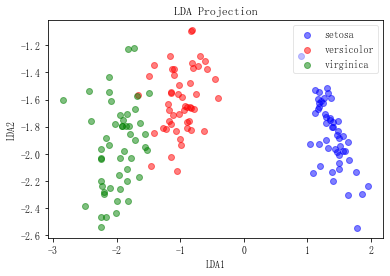

In [57]:
plot(lda_iris_projection, iris_y, "LDA Projection", "LDA1", "LDA2") 

注意在图中，数据几乎完全突出出来了（甚至比 PCA的投影效果还好），因为 LDA 会绘制 决策边界，提供特征向量/线性判别式，从而帮助机器学习模型尽可能分离各种花。这有助于将 数据投影到每个类别都尽可能分散的空间中。 

### 6.3.2 在scikit-learn中使用 LDA 

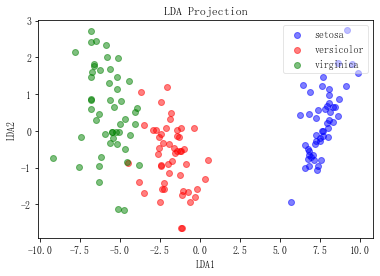

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 实例化 LDA 模块
lda = LinearDiscriminantAnalysis(n_components=2)

# 拟合并转换鸢尾花数据 
X_lda_iris = lda.fit_transform(iris_X, iris_y)

# 绘制投影数据
plot(X_lda_iris, iris_y, 'LDA Projection', 'LDA1', 'LDA2')

上图是手动执行LDA时投影的镜像，看起来还可以。回想一下，在PCA中我们有过符号相反的特征向量，但这不会影响机器学习流水线。**在LDA模块中，我们需要注意一些差别。LDA有一个scalings_属性，没有components_，但是二者的行为基本相同：**

In [59]:
# 和 pca.components_基本一样，但是转置了（4 × 2，而不是 2 × 4）
lda.scalings_

array([[ 0.82937764,  0.02410215],
       [ 1.53447307,  2.16452123],
       [-2.20121166, -0.93192121],
       [-2.81046031,  2.83918785]])

In [60]:
# 和手动计算一样 
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

然而，这些判别式乍看之下和之前手动计算的特征向量完全不同。这是因为scikit-learn计算特征向量的方式虽然得到了相同的结果，但是会进行标量缩放，如下所示：

In [61]:
# scikit-learn 计算的结果和手动一样，但是有缩放 
for manual_component, sklearn_component in zip(eig_vecs.T[:2], lda.scalings_.T):
    print(sklearn_component / manual_component) 

[3.97322221 3.97322221 3.97322221 3.97322221]
[-3.68987776 -3.68987776 -3.68987776 -3.68987776]


我们在 LDA上拟合缩放后的鸢尾花数据，看看差异： 

In [62]:
# 用 LDA 拟合缩放数据 
X_lda_iris = lda.fit_transform(X_scaled, iris_y)
lda.scalings_# 缩放后数据的尺度不同 

array([[ 0.68448644,  0.01989153],
       [ 0.66659193,  0.94029176],
       [-3.87282074, -1.63962597],
       [-2.13508598,  2.15691008]])

In [63]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

先在截断后的数据集上用 LDA拟合并转换，只保留前两个特征： 

In [64]:
# 在截断的数据集上拟合 
iris_2_dim_transformed_lda = lda.fit_transform(iris_2_dim, iris_y) 

In [65]:
# 投影数据 
iris_2_dim_transformed_lda[:5,] 

array([[-6.0424185 ,  0.05692487],
       [-6.0424185 ,  0.05692487],
       [-6.19685555,  0.27304711],
       [-5.88798144, -0.15919736],
       [-6.0424185 ,  0.05692487]])

In [66]:
# 名称不同 
components = lda.scalings_.T  # 转置为和 PCA 一样，行变成判别式 
print(components)

[[ 1.54437053  2.40239438]
 [-2.16122235  5.04259916]]


In [67]:
np.dot(iris_2_dim, components.T)[:5,] # 和 transform 一样 

array([[-6.0424185 ,  0.05692487],
       [-6.0424185 ,  0.05692487],
       [-6.19685555,  0.27304711],
       [-5.88798144, -0.15919736],
       [-6.0424185 ,  0.05692487]])

In [68]:
# 原始特征的相关性很大 
np.corrcoef(iris_2_dim.T) 

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

In [69]:
# LDA 的相关性极小，和 PCA 一样 
np.corrcoef(iris_2_dim_transformed_lda.T) 

array([[1.00000000e+00, 1.85074144e-15],
       [1.85074144e-15, 1.00000000e+00]])

[(-3.0, 3.0),
 Text(0, 0.5, 'lda component 2'),
 (-10.0, 10.0),
 Text(0.5, 0, 'lda component 1'),
 Text(0.5, 1.0, 'Linear Discriminant Analysis Projected Data')]

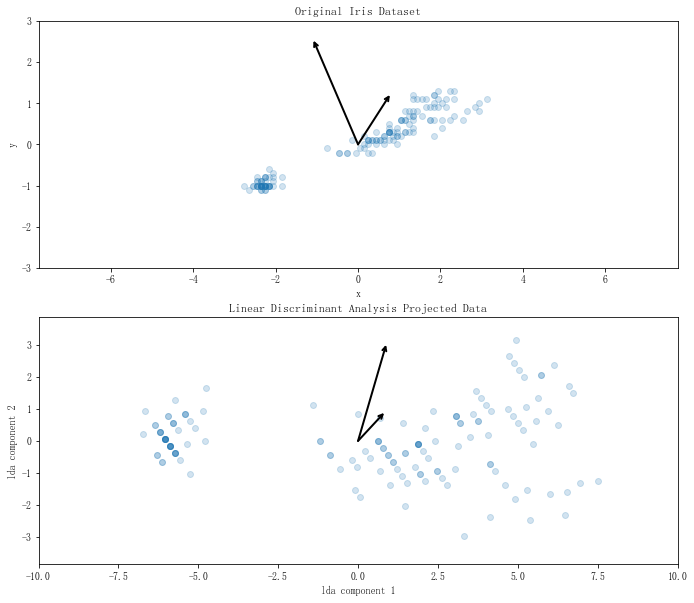

In [70]:
# 下面的代码展示原始数据和用 LDA 投影后的数据 
# 但是在图上，每个缩放都按数据的向量处理 
# 长箭头是第一个缩放向量，短箭头是第二个 

def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)
for length, vector in zip(lda.explained_variance_ratio_, components):
    v = vector * .5
    draw_vector(lda.xbar_, lda.xbar_ + v, ax=ax[0])  # lda.xbar_ is equivalent to pca.mean_
ax[0].axis('equal')
ax[0].set(xlabel='x', ylabel='y', title='Original Iris Dataset',
         xlim=(-3, 3), ylim=(-3, 3))

ax[1].scatter(iris_2_dim_transformed_lda[:, 0], iris_2_dim_transformed_lda[:, 1], alpha=0.2)
for length, vector in zip(lda.explained_variance_ratio_, components):
    transformed_component = lda.transform([vector])[0]
    v = transformed_component * .1
    draw_vector(iris_2_dim_transformed_lda.mean(axis=0), iris_2_dim_transformed_lda.mean(axis=0) + v, ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='lda component 1', ylabel='lda component 2',
          title='Linear Discriminant Analysis Projected Data',
          xlim=(-10, 10), ylim=(-3, 3))

## 6.4 LDA与 PCA：使用鸢尾花数据集 

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# 创建一个可以使用 cross_val_score 模块进行交叉验证的机器学习流水线

In [72]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# 创建有一个主成分的 PCA 模块 
single_pca = PCA(n_components=1) 
 
# 创建有一个判别式的 LDA 模块 
single_lda = LinearDiscriminantAnalysis(n_components=1) 

# 实例化 KNN 模型
knn = KNeighborsClassifier(n_neighbors=3)


In [73]:
# 不用特征转换，用 KNN 进行交叉验证
knn_average = cross_val_score(knn, iris_X, iris_y).mean()

# 这是基线准确率。如果什么也不做，KNN 的准确率是 98% 
knn_average

0.9666666666666668

要击败的基线准确率是 98.04%。我们用 LDA，只保留好的线性判别式： 

In [74]:
lda_pipeline = Pipeline([('lda', single_lda), ('knn', knn)])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()
lda_average

0.9666666666666666

In [75]:
# 创建执行 PCA 的流水线 
pca_pipeline = Pipeline([('pca', single_pca), ('knn', knn)])

pca_average = cross_val_score(pca_pipeline, iris_X, iris_y).mean() 
pca_average
# 毫无疑问，表现差。 

0.9

试试加一个 LDA判别式是否有用： 

In [76]:
# 试试有两个判别式的 LDA
lda_pipeline = Pipeline([('lda', LinearDiscriminantAnalysis(n_components=2)), ('knn', knn)])

lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()
lda_average

0.9733333333333334

用两个判别式就可以达到原始的准确率！不错，但是我们希望做得更好。看看上一章的特征选择模块是否有帮助。我们导入SelectKBest模块，看看统计特征选择能否让LDA模块做到好：

In [77]:
# 用特征选择工具和特征转换工具做对比
from sklearn.feature_selection import SelectKBest

# 尝试所有的 k 值，但是不包括全部保留
for k in [1, 2, 3]:
    select_pipeline = Pipeline([('select', SelectKBest(k=k)), ('knn', knn)])
    select_average = cross_val_score(select_pipeline, iris_X, iris_y).mean()
    print(k, "best feature has accuracy:", select_average) 

1 best feature has accuracy: 0.9533333333333334
2 best feature has accuracy: 0.9533333333333334
3 best feature has accuracy: 0.9733333333333334


到目前为止，拥有两个判别式的LDA暂时领先。在生产中，联合使用有监督和无监督的特征转换是很常见的。我们设置一个GridSearch模块，找到下列参数的佳组合：

- 缩放数据（用或不用均值/标准差）； 

- PCA主成分； 

- LDA判别式； 

- KNN邻居。

下面的代码会建立一个get_best_model_and_accuracy函数，向其传入一个模型（scikit-learn或其他模型）、一个字典形式的参数网，以及X和y数据集，会输出网格搜索模块的结果。输出是模型的佳表现（准确率）、获得佳表现时的好参数、平均拟合时间，以及平均预测时间：

In [78]:
from sklearn.model_selection import GridSearchCV

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, params, error_score=0.)# 如果报错，结果是0
    grid.fit(X, y)
    # 经典的性能指标
    print("Best Accuracy: {}".format(grid.best_score_))
    # 得到最佳准确率的最佳参数
    print("Best Parameters: {}".format(grid.best_params_)) # 拟合的平均时间(秒)
    print("Average Time to Fit (s):{}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3))) # 预测的平均时间(秒)
    # 从该指标可以看出模型在真实世界的性能
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

设置好接收模型和参数的函数后，我们可以组合使用缩放、PCA、LDA和KNN对流水线进行测试了：

In [79]:
from sklearn.model_selection import GridSearchCV

iris_params = {
    'preprocessing__scale__with_std': [True, False], 
    'preprocessing__scale__with_mean': [True, False],
    'preprocessing__pca__n_components':[1, 2, 3, 4],
    # 根据 scikit-learn 文档，LDA 的最大 n_components 是类别数减 1 
    'preprocessing__lda__n_components':[1, 2],
    'clf__n_neighbors': range(1, 9)
}
# 更大的流水线
preprocessing = Pipeline([('scale', StandardScaler()),
                          ('pca', PCA()),
                          ('lda', LinearDiscriminantAnalysis())])

iris_pipeline = Pipeline(steps=[('preprocessing', preprocessing),
                                ('clf', KNeighborsClassifier())])

In [80]:
preprocessing

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lda',
                 LinearDiscriminantAnalysis(n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

In [81]:
iris_pipeline

Pipeline(memory=None,
         steps=[('preprocessing',
                 Pipeline(memory=None,
                          steps=[('scale',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True)),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=None, random_state=None,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False)),
                                 ('lda',
                                  LinearDiscriminantAnalysis(n_components=None,
                                                             priors=None,
                                                             shrinkage=None,
                                                             solver='svd',
                                                             sto

In [82]:
import warnings

warnings.filterwarnings('ignore')

get_best_model_and_accuracy(iris_pipeline, iris_params, iris_X, iris_y)

Best Accuracy: 0.9933333333333334
Best Parameters: {'clf__n_neighbors': 8, 'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 3, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s):0.005
Average Time to Score (s):0.005


好的准确率（接近99%）结合了缩放、PCA和LDA。在流水线中结合使用这3种算法并且用超参数进行微调是很常见的。因此，在生产环境下，好的机器学习流水线实际上是多种特征工程工具的组合。

## 6.5 小结

总结一下，PCA和LDA都是特征转换工具，用于找出优的新特征。LDA特别为类别分离进行了优化，而PCA是无监督的，尝试用更少的特征表达方差。一般来说，这两个算法在流水线中会一同使用，像上面的例子那样。在后一章中，我们会研究两个案例，在文本聚类和面部识别软件中利用PCA和LDA。

PCA和LDA都是很强大的工具，但也有局限性。这两个工具都是线性转换，所以只能创建线性的边界，表达数值型数据。它们也是静态转换。无论输入什么，LDA和PCA的输出都是可预期的，而且是数学的。如果数据不适合PCA或LDA（数据有非线性特征，例如是圆形的），那么无论我们怎么进行网格搜索，这些算法都不会有什么帮助。

下一章介绍特征学习算法。可以说，特征学习算法是强大的特征工程算法。这些算法可以从输入的数据中学习新特征，不必像PCA或LDA那样对数据特性有所假设。我们还会使用包括神经网络在内的复杂结构，实现高级别的特征工程。